In [1]:
import scipy
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lmb = 1
g = lambda x: lmb * np.exp(- lmb * x)
G = lambda x: scipy.integrate.quad(g, 0, np.inf)[0] - scipy.integrate.quad(g, 0, x)[0]

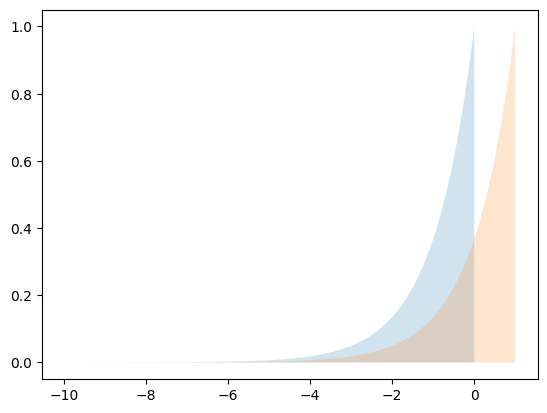

In [3]:
#для двух траловых процессов
s = np.linspace(-10, 0, 1000)
t = [0,1]
for t0 in t:
    plt.fill_between(s + t0, g(-s), alpha = 0.2)

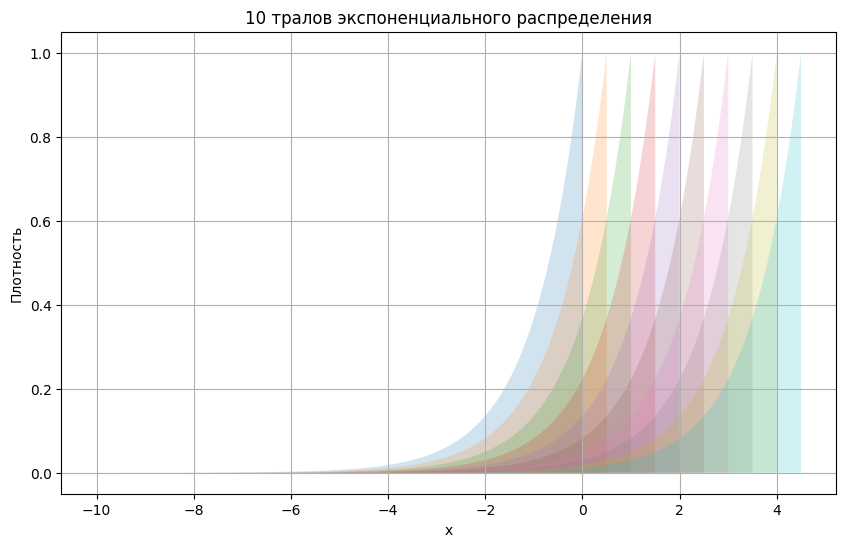

In [4]:
lmb = 1
g = lambda x: lmb * np.exp(-lmb * x)
G = lambda x: scipy.integrate.quad(g, 0, np.inf)[0] - scipy.integrate.quad(g, 0, x)[0]

s = np.linspace(-10, 0, 1000)

t = np.linspace(0, 4.5, 10)

plt.figure(figsize=(10, 6))
for t0 in t:
    plt.fill_between(s + t0, g(-s), alpha=0.2)

plt.title("10 тралов экспоненциального распределения")
plt.xlabel("x")
plt.ylabel("Плотность")
plt.grid(True)
plt.show()

In [5]:
lmb = 1
g = lambda x: lmb * np.exp(-lmb * x) if x >= 0 else 0
G = lambda x: scipy.integrate.quad(g, 0, np.inf)[0] - scipy.integrate.quad(g, 0, x)[0]

t = np.linspace(0, 4.5, 10)
m = len(t)

A = np.zeros((m, m))

for i in range(m):
  for j in range(m):
    if i > 0 and j < m - 1:
      A[i, j] = (
        G(t[j + 1] - t[i]) - G(t[j + 1] - t[i - 1])
        + G(t[j] - t[i - 1]) - G(t[j] - t[i])
      )
    elif i > 0 and j == m - 1:
      A[i, j] = G(t[j] - t[i - 1]) - G(t[j] - t[i])
    elif i == 0 and j < m - 1:
      A[i, j] = G(t[j + 1] - t[i]) - G(t[j] - t[i])
    elif i == 0 and j == m - 1:
      A[i, j] = G(t[j] - t[i])

print(A)

[[-0.39346934 -0.23865122 -0.14474928 -0.08779488 -0.05325028 -0.03229793
  -0.01958968 -0.01188174 -0.00720664  0.011109  ]
 [ 0.39346934 -0.15481812 -0.09390194 -0.0569544  -0.03454459 -0.02095235
  -0.01270825 -0.00770794 -0.0046751  -0.00720664]
 [ 0.          0.39346934 -0.15481812 -0.09390194 -0.0569544  -0.03454459
  -0.02095235 -0.01270825 -0.00770794 -0.01188174]
 [ 0.          0.          0.39346934 -0.15481812 -0.09390194 -0.0569544
  -0.03454459 -0.02095235 -0.01270825 -0.01958968]
 [ 0.          0.          0.          0.39346934 -0.15481812 -0.09390194
  -0.0569544  -0.03454459 -0.02095235 -0.03229793]
 [ 0.          0.          0.          0.          0.39346934 -0.15481812
  -0.09390194 -0.0569544  -0.03454459 -0.05325028]
 [ 0.          0.          0.          0.          0.          0.39346934
  -0.15481812 -0.09390194 -0.0569544  -0.08779488]
 [ 0.          0.          0.          0.          0.          0.
   0.39346934 -0.15481812 -0.09390194 -0.14474928]
 [ 0.    

In [6]:
A00 = -(G(t[1] - t[0]) - G(0))
A01 = G(t[1] - t[0])
A11 = -(G(t[1] - t[0]) - G(t[0]))

In [7]:
print(A00, A01, A11)

0.3934693402873666 0.6065306597126336 0.3934693402873666


In [8]:
A00_value = stats.norm.rvs(scale = np.sqrt(A00))
A01_value = stats.norm.rvs(scale = np.sqrt(A01))
A11_value = stats.norm.rvs(scale = np.sqrt(A11))

In [9]:
Y0 = A00_value + A01_value
Y1 = A01_value + A11_value

In [10]:
Y0, Y1

(np.float64(1.5968063991405232), np.float64(1.97856168284192))